<a href="https://colab.research.google.com/github/RoseMaryBiju/AnyBook---Library-Management-iOS-App/blob/main/unit_5_Smart_Attendance_System_using_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Attendance System using Face Recognition

**Objective:** Build a system that automatically identifies known faces in images (or frames)
and records attendance with timestamps.

**Concepts Covered:**
- Face detection
- Face encoding & recognition
- Attendance logging (CSV)
- Real-world use in schools and offices

**Libraries:** face_recognition, OpenCV, pandas

**Dataset:** A few labeled face images (you will upload them).

**How it works:**
1. Load known faces and their names.
2. Detect faces in test image.
3. Compare encodings with known faces.
4. Mark recognized names with timestamps in attendance.csv.


In [ ]:
# --- Step 1: Install and import required libraries ---
!pip install -q opencv-python opencv-contrib-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset shape: (400, 64, 64)


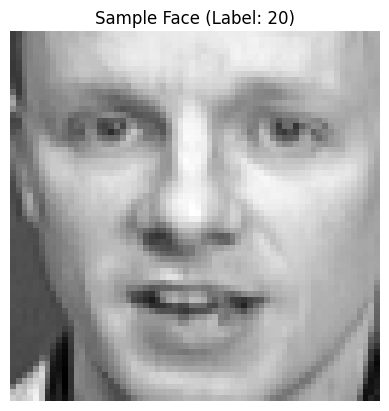

In [ ]:
# --- Step 2: Download a  dataset (e.g., Olivetti Faces) ---
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces(shuffle=True, random_state=42)
images = data.images
labels = data.target

print("Dataset shape:", images.shape)
plt.imshow(images[0], cmap='gray')
plt.title(f"Sample Face (Label: {labels[0]})")
plt.axis('off')
plt.show()


In [ ]:
# --- Step 3: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Flatten images for PCA
X_train_flat = [x.flatten() for x in X_train]
X_test_flat = [x.flatten() for x in X_test]


In [ ]:
# --- Step 4: Train Eigenface model using OpenCV ---
model = cv2.face.EigenFaceRecognizer_create(num_components=80)
model.train(np.array(X_train_flat, dtype=np.float32), np.array(y_train))
print(" Model trained successfully!")


 Model trained successfully!


 Accuracy: 91.25%


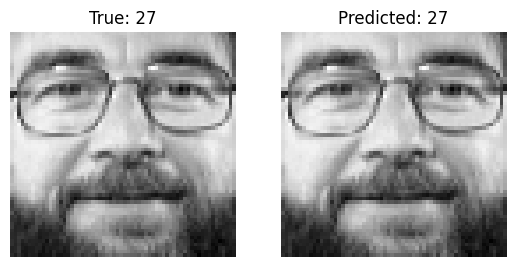

In [ ]:
# --- Step 5: Evaluate on test data ---
predictions = []
for img in X_test_flat:
    label, confidence = model.predict(np.array(img, dtype=np.float32))
    predictions.append(label)

acc = accuracy_score(y_test, predictions)
print(f" Accuracy: {acc * 100:.2f}%")

# Visualize one prediction
i = 5
plt.subplot(1,2,1)
plt.imshow(X_test[i], cmap='gray')
plt.title(f"True: {y_test[i]}")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(X_test[i], cmap='gray')
plt.title(f"Predicted: {predictions[i]}")
plt.axis('off')
plt.show()
